In [89]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [87]:
import warnings
warnings.filterwarnings('ignore') # ignore warnings

In [ ]:
import google.colab.drive
google.colab.drive.mount('/content/drive')

Mounted at /content/drive


## DATA EXPLORATION

In [ ]:
data_test = pd.read_csv('/content/drive/MyDrive/fraudTest.csv') # reading train set
data_train = pd.read_csv('/content/drive/MyDrive/fraudTrain.csv') # reading test set

In [ ]:
data_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
data_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
print(f"Shape of training data: {data_train.shape}")
print(f"Shape of test data: {data_test.shape}")

Shape of training data: (1296675, 23)
Shape of test data: (555719, 23)


In [ ]:
data = pd.concat([data_train, data_test]) # concatenating both datasets
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
data.shape

(1852394, 23)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud               i

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1852394.0,5.371934e+05,3.669110e+05,0.000000e+00,2.315490e+05,4.630980e+05,8.335758e+05,1.296674e+06
cc_num,1852394.0,4.173860e+17,1.309115e+18,6.041621e+10,1.800429e+14,3.521417e+15,4.642255e+15,4.992346e+18
amt,1852394.0,7.006357e+01,1.592540e+02,1.000000e+00,9.640000e+00,4.745000e+01,8.310000e+01,2.894890e+04
zip,1852394.0,4.881326e+04,2.688185e+04,1.257000e+03,2.623700e+04,4.817400e+04,7.204200e+04,9.992100e+04
lat,1852394.0,3.853931e+01,5.071470e+00,2.002710e+01,3.466890e+01,3.935430e+01,4.194040e+01,6.669330e+01
long,1852394.0,-9.022783e+01,1.374789e+01,-1.656723e+02,-9.679800e+01,-8.747690e+01,-8.015800e+01,-6.795030e+01
city_pop,1852394.0,8.864367e+04,3.014876e+05,2.300000e+01,7.410000e+02,2.443000e+03,2.032800e+04,2.906700e+06
unix_time,1852394.0,1.358674e+09,1.819508e+07,1.325376e+09,1.343017e+09,1.357089e+09,1.374581e+09,1.388534e+09
merch_lat,1852394.0,3.853898e+01,5.105604e+00,1.902742e+01,3.474012e+01,3.936890e+01,4.195626e+01,6.751027e+01
merch_long,1852394.0,-9.022794e+01,1.375969e+01,-1.666716e+02,-9.689944e+01,-8.744069e+01,-8.024511e+01,-6.695090e+01


In [ ]:
data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
data.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1852394.0,5.371934e+05,3.669110e+05,0.000000e+00,2.315490e+05,4.630980e+05,8.335758e+05,1.296674e+06
cc_num,1852394.0,4.173860e+17,1.309115e+18,6.041621e+10,1.800429e+14,3.521417e+15,4.642255e+15,4.992346e+18
amt,1852394.0,7.006357e+01,1.592540e+02,1.000000e+00,9.640000e+00,4.745000e+01,8.310000e+01,2.894890e+04
zip,1852394.0,4.881326e+04,2.688185e+04,1.257000e+03,2.623700e+04,4.817400e+04,7.204200e+04,9.992100e+04
lat,1852394.0,3.853931e+01,5.071470e+00,2.002710e+01,3.466890e+01,3.935430e+01,4.194040e+01,6.669330e+01
long,1852394.0,-9.022783e+01,1.374789e+01,-1.656723e+02,-9.679800e+01,-8.747690e+01,-8.015800e+01,-6.795030e+01
city_pop,1852394.0,8.864367e+04,3.014876e+05,2.300000e+01,7.410000e+02,2.443000e+03,2.032800e+04,2.906700e+06
unix_time,1852394.0,1.358674e+09,1.819508e+07,1.325376e+09,1.343017e+09,1.357089e+09,1.374581e+09,1.388534e+09
merch_lat,1852394.0,3.853898e+01,5.105604e+00,1.902742e+01,3.474012e+01,3.936890e+01,4.195626e+01,6.751027e+01
merch_long,1852394.0,-9.022794e+01,1.375969e+01,-1.666716e+02,-9.689944e+01,-8.744069e+01,-8.024511e+01,-6.695090e+01


In [ ]:
data.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
# printing unique values for each column in the dataset

for cols in data.columns:
  print(f"{cols} : {data[cols].value_counts()}")

Unnamed: 0 : Unnamed: 0
0          2
370474     2
370488     2
370487     2
370486     2
          ..
802705     1
802706     1
802707     1
802708     1
1296674    1
Name: count, Length: 1296675, dtype: int64
trans_date_trans_time : trans_date_trans_time
2019-04-22 16:02:01    4
2020-06-02 12:47:07    4
2020-10-05 19:37:49    4
2020-06-01 01:37:47    4
2020-12-17 20:36:39    4
                      ..
2019-09-21 09:31:54    1
2019-09-21 09:31:49    1
2019-09-21 09:31:24    1
2019-09-21 09:29:49    1
2020-12-31 23:59:34    1
Name: count, Length: 1819551, dtype: int64
cc_num : cc_num
6538441737335434       4392
30270432095985         4392
6538891242532018       4386
4364010865167176       4386
4642255475285942       4386
                       ... 
4714017207228610634       7
4352307151555405069       7
180097223252063           7
6011732631674654          7
4295296907373             6
Name: count, Length: 999, dtype: int64
merchant : merchant
fraud_Kilback LLC                        62

In [ ]:
data.nunique()

Unnamed: 0               1296675
trans_date_trans_time    1819551
cc_num                       999
merchant                     693
category                      14
amt                        60616
first                        355
last                         486
gender                         2
street                       999
city                         906
state                         51
zip                          985
lat                          983
long                         983
city_pop                     891
job                          497
dob                          984
trans_num                1852394
unix_time                1819583
merch_lat                1754157
merch_long               1809753
is_fraud                       2
dtype: int64

## **EXPLORATORY DATA ANALYSIS**

[]

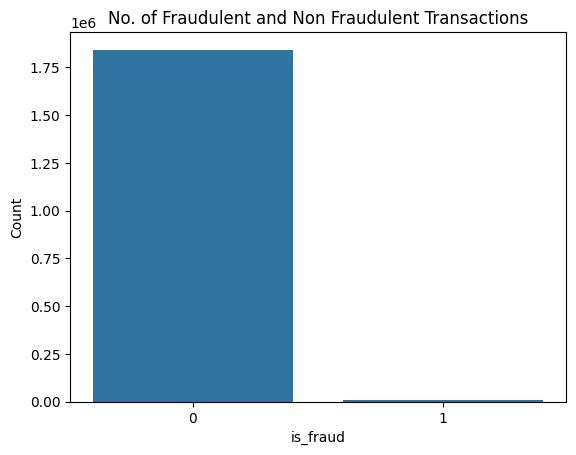

In [ ]:
sns.countplot(data = data, x = 'is_fraud')
plt.title('No. of Fraudulent and Non Fraudulent Transactions')
plt.xlabel('is_fraud')
plt.ylabel('Count')
plt.plot()

We can see that, as usual, the number of fraudulent transactions is much smaller, which can lead our model to predict non fraudulent (0) with higher performance than fraud (1) transactions.

In [ ]:
fraud = data[data['is_fraud'] == 1]
non_fraud = data[data['is_fraud'] == 0]

print(f"Number of Fraudulent Transactions: {fraud.shape[0]}")
print(f"Number of Non Fraudulent Transactions: {non_fraud.shape[0]}")

Number of Fraudulent Transactions: 9651
Number of Non Fraudulent Transactions: 1842743


[]

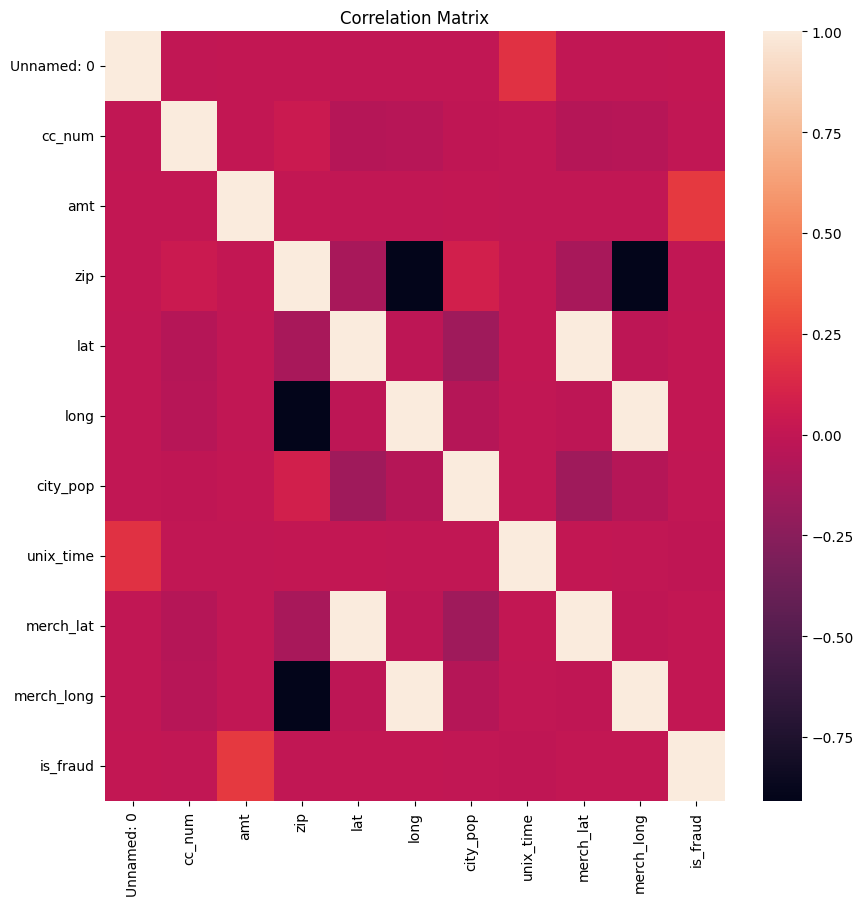

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(data[[i for i in data.columns if data[i].dtype == 'int' or data[i].dtype == 'float64']].corr(), annot = False)
plt.title('Correlation Matrix')
plt.plot()

## **DATA PREPARATION**

In [ ]:
# training the model without balancing the dataset

In [ ]:
# removing redundant columns
cols = ['Unnamed: 0',
        'merchant',
        'cc_num',
        'first',
        'last',
        'gender',
        'trans_num',
        'unix_time',
        'street',
        'merch_lat',
        'merch_long',
        'job',
        'zip',
        'city',
        'state'
        ]
data.drop(columns = cols, inplace = True)

In [ ]:
data.head()

,trans_date_trans_time,category,amt,lat,long,city_pop,dob,is_fraud
0,2019-01-01 00:00:18,misc_net,4.97,36.0788,-81.1781,3495,1988-03-09,0
1,2019-01-01 00:00:44,grocery_pos,107.23,48.8878,-118.2105,149,1978-06-21,0
2,2019-01-01 00:00:51,entertainment,220.11,42.1808,-112.2620,4154,1962-01-19,0
3,2019-01-01 00:01:16,gas_transport,45.00,46.2306,-112.1138,1939,1967-01-12,0
4,2019-01-01 00:03:06,misc_pos,41.96,38.4207,-79.4629,99,1986-03-28,0


In [ ]:
# convert 'trans_date_trans_time' and 'dob' to datetime datatype

data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['dob'] = pd.to_datetime(data['dob'])

data['trans_date_trans_time'] = data['trans_date_trans_time'].dt.hour # extract hour of the day the transaction occured
data['dob'] = data['dob'].dt.year # extract year of birth

data = data.rename(columns = {'trans_date_trans_time': 'hour_transaction'})

# Function to get time of day
def get_tod(hour):
    if 4 < hour['hour_transaction'] <= 12:
        ans = 'morning'
    elif 12 < hour['hour_transaction'] <= 20:
        ans = 'afternoon'
    elif hour['hour_transaction'] <= 4 or hour['hour_transaction'] > 20:
        ans = 'night'
    return ans

data['hour_transaction'] = data.apply(get_tod, axis = 1)
data.head()

,hour_transaction,category,amt,lat,long,city_pop,dob,is_fraud
0,night,misc_net,4.97,36.0788,-81.1781,3495,1988,0
1,night,grocery_pos,107.23,48.8878,-118.2105,149,1978,0
2,night,entertainment,220.11,42.1808,-112.2620,4154,1962,0
3,night,gas_transport,45.00,46.2306,-112.1138,1939,1967,0
4,night,misc_pos,41.96,38.4207,-79.4629,99,1986,0


In [ ]:
data = data.rename(columns = {'dob': 'age'})

In [ ]:
data['age'] = datetime.now().year - data['age']

data.head()

,hour_transaction,category,amt,lat,long,city_pop,age,is_fraud
0,night,misc_net,4.97,36.0788,-81.1781,3495,36,0
1,night,grocery_pos,107.23,48.8878,-118.2105,149,46,0
2,night,entertainment,220.11,42.1808,-112.2620,4154,62,0
3,night,gas_transport,45.00,46.2306,-112.1138,1939,57,0
4,night,misc_pos,41.96,38.4207,-79.4629,99,38,0


In [ ]:
# encoding categorical features

ord_enc = OrdinalEncoder()

data['category'] = ord_enc.fit_transform(data[['category']])
data['hour_transaction'] = ord_enc.fit_transform(data[['hour_transaction']])

data.head()

,hour_transaction,category,amt,lat,long,city_pop,age,is_fraud
0,2.0,8.0,4.97,36.0788,-81.1781,3495,36,0
1,2.0,4.0,107.23,48.8878,-118.2105,149,46,0
2,2.0,0.0,220.11,42.1808,-112.2620,4154,62,0
3,2.0,2.0,45.00,46.2306,-112.1138,1939,57,0
4,2.0,9.0,41.96,38.4207,-79.4629,99,38,0


In [ ]:
data.dtypes

hour_transaction    float64
category            float64
amt                 float64
lat                 float64
long                float64
city_pop              int64
age                   int64
is_fraud              int64
dtype: object

In [ ]:
data_un_bal = data.copy()
data_un_bal.head()

,hour_transaction,category,amt,lat,long,city_pop,age,is_fraud
0,2.0,8.0,4.97,36.0788,-81.1781,3495,36,0
1,2.0,4.0,107.23,48.8878,-118.2105,149,46,0
2,2.0,0.0,220.11,42.1808,-112.2620,4154,62,0
3,2.0,2.0,45.00,46.2306,-112.1138,1939,57,0
4,2.0,9.0,41.96,38.4207,-79.4629,99,38,0


## **MODEL BUILDING**

Model Pipeline For Unbalanced and Unscaled Data

Models Used -
1. Balanced Random Forest Classifier
2. Random Forest Classifier

In [ ]:
X_unb = data_un_bal.drop(columns = ['is_fraud'])
y_unb = data_un_bal['is_fraud']

In [ ]:
x_unb_train, x_unb_test, y_unb_train, y_unb_test = train_test_split(X_unb, y_unb, test_size = 0.2, random_state = 42)

In [ ]:
clfs_unb = {
    'Balanced Random Forest Classifier': BalancedRandomForestClassifier(random_state = 42),
    'Random Forest Classifier': RandomForestClassifier(class_weight = 'balanced', random_state = 42)
}

In [ ]:
def train_clfs_unb(clfs, x_unb_train, y_unb_train, x_unb_test, y_unb_test):
  clfs.fit(x_unb_train, y_unb_train)
  y_unb_pred = clfs.predict(x_unb_test)
  print(classification_report(y_unb_test, y_unb_pred))
  cm = confusion_matrix(y_unb_test, y_unb_pred)
  print(cm)

In [ ]:
for name, clf in clfs_unb.items():
  print(f"Model: {name}")
  train_clfs_unb(clf, x_unb_train, y_unb_train, x_unb_test, y_unb_test)

Model: Balanced Random Forest Classifier
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    368526
           1       0.16      0.97      0.28      1953

    accuracy                           0.97    370479
   macro avg       0.58      0.97      0.63    370479
weighted avg       1.00      0.97      0.98    370479

[[358891   9635]
 [    65   1888]]
Model: Random Forest Classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368526
           1       0.88      0.72      0.79      1953

    accuracy                           1.00    370479
   macro avg       0.94      0.86      0.90    370479
weighted avg       1.00      1.00      1.00    370479

[[368341    185]
 [   547   1406]]


Model Pipeline For balanced and scaled data

Models Used -
1. Logistic Regression
2. K Neighbors Classifier
3. Support Vector Classifier
4. Decision Tree Classifier
5. Random Forest Classifier
6. XG Boost Classifier

In [ ]:
data_bal = data.copy()
data_bal.head()

,hour_transaction,category,amt,lat,long,city_pop,age,is_fraud
0,2.0,8.0,4.97,36.0788,-81.1781,3495,36,0
1,2.0,4.0,107.23,48.8878,-118.2105,149,46,0
2,2.0,0.0,220.11,42.1808,-112.2620,4154,62,0
3,2.0,2.0,45.00,46.2306,-112.1138,1939,57,0
4,2.0,9.0,41.96,38.4207,-79.4629,99,38,0


In [90]:
fraud = data[data['is_fraud'] == 1]
non_fraud = data[data['is_fraud'] == 0]

data_bal = pd.concat([fraud, non_fraud.sample(len(fraud), random_state= 42)]) # balancing the dataset

In [ ]:
data_bal.shape

(19302, 8)

In [ ]:
# scaling dataset using MinMax Scaler

scaler = MinMaxScaler()

data_bal_scaled = scaler.fit_transform(data_bal)
data_bal_scaled = pd.DataFrame(data_bal_scaled, columns = data_bal.columns)
data_bal_scaled.head()

,hour_transaction,category,amt,lat,long,city_pop,age,is_fraud
0,1.0,0.307692,0.037304,0.342164,0.859026,0.000297,0.209877,1.0
1,1.0,0.153846,0.001401,0.201707,0.687801,0.549003,0.555556,1.0
2,1.0,0.307692,0.036672,0.201707,0.687801,0.549003,0.555556,1.0
3,1.0,0.153846,0.000803,0.342164,0.859026,0.000297,0.209877,1.0
4,1.0,0.307692,0.036594,0.201707,0.687801,0.549003,0.555556,1.0


In [ ]:
X_bal = data_bal_scaled.drop(columns = ['is_fraud'])
y_bal = data_bal_scaled['is_fraud']

x_bal_train, x_bal_test, y_bal_train, y_bal_test = train_test_split(X_bal, y_bal, test_size = 0.2, random_state = 42)

In [ ]:
clfs_bal = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}

In [ ]:
def train_clfs_unb(clfs, x_bal_train, y_bal_train, x_bal_test, y_bal_test):
  clfs.fit(x_bal_train, y_bal_train)
  y_bal_pred = clfs.predict(x_bal_test)
  print(classification_report(y_bal_test, y_bal_pred))
  cm = confusion_matrix(y_bal_test, y_bal_pred)
  print(cm)

In [ ]:
for name, clf in clfs_bal.items():
  print(f"Model: {name}")
  train_clfs_unb(clf, x_unb_train, y_unb_train, x_unb_test, y_unb_test)

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    368526
           1       0.00      0.00      0.00      1953

    accuracy                           0.99    370479
   macro avg       0.50      0.50      0.50    370479
weighted avg       0.99      0.99      0.99    370479

[[368366    160]
 [  1953      0]]
Model: KNN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368526
           1       0.60      0.30      0.40      1953

    accuracy                           1.00    370479
   macro avg       0.80      0.65      0.70    370479
weighted avg       0.99      1.00      0.99    370479

[[368132    394]
 [  1361    592]]
Model: SVC
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    368526
           1       0.00      0.00      0.00      1953

    accuracy                           0.99    370479
   macro 

In [ ]:
xgb = XGBClassifier(objective='binary:logistic')
xgb.fit(x_bal_train, y_bal_train)
y_pred = xgb.predict(x_bal_test)
print(classification_report(y_bal_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97      1932
         1.0       0.97      0.97      0.97      1929

    accuracy                           0.97      3861
   macro avg       0.97      0.97      0.97      3861
weighted avg       0.97      0.97      0.97      3861



Hyper-parameter Tuning for baseline models with good recall score for fraudulent transactions

Models -
1. XG Boost Classifier
2. Random Forest Classifier
3. Decision Tree Classifier
4. Balanced Random Forest Classifier (Unbalanced Dataset)

In [ ]:
def classification_report_hpt_models(best_params, model, x_bal_train, y_bal_train, x_bal_test, y_bal_test):
  model.set_params(**best_params)
  model.fit(x_bal_train, y_bal_train)
  y_pred = model.predict(x_bal_test)
  print(classification_report(y_bal_test, y_pred))
  cm = confusion_matrix(y_bal_test, y_pred)
  print(cm)

In [ ]:
# hyper-parameter tuning for XGBoost Classifier

param_grid_xgb = {'n_estimators' : [100, 200, 300], 'max_depth' : [None, 10, 20, 30],
                  'learning_rate' : [0.01, 0.1, 0.2, 0.3]}

xgb_hpt = XGBClassifier(objective = 'binary:logistic', random_state = 42)

grid_xgb = GridSearchCV(xgb_hpt, param_grid = param_grid_xgb, scoring = 'recall', cv = 5)

grid_xgb.fit(x_bal_train, y_bal_train)

best_params_xgb = grid_xgb.best_params_
print(f"Best Parameters found by GridSearchCV: {best_params_xgb}")

Best Parameters found by GridSearchCV: {'learning_rate': 0.2, 'max_depth': None, 'n_estimators': 100}


In [ ]:
classification_report_hpt_models(best_params_xgb, xgb_hpt, x_bal_train, y_bal_train, x_bal_test, y_bal_test)

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97      1932
         1.0       0.97      0.97      0.97      1929

    accuracy                           0.97      3861
   macro avg       0.97      0.97      0.97      3861
weighted avg       0.97      0.97      0.97      3861

[[1873   59]
 [  52 1877]]


In [ ]:
# hyper-parameter tuning for Random Forest Classifier

rfc_hpt = RandomForestClassifier(random_state = 42)

param_grid_rfc = param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_rfc = GridSearchCV(rfc_hpt, param_grid = param_grid_rfc, scoring = 'recall', cv = 5)

grid_rfc.fit(x_bal_train, y_bal_train)

best_params_rfc = grid_rfc.best_params_
print(f"Best Parameters found by GridSearchCV: {best_params_rfc}")

In [ ]:
classification_report_hpt_models(best_params_rfc, rfc_hpt, x_bal_train, y_bal_train, x_bal_test, y_bal_test)

In [ ]:
dtc_hpt = DecisionTreeClassifier(random_state = 42)

param_grid_dtc = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'criterion': ['gini', 'entropy']
}

grid_dtc = GridSearchCV(dtc_hpt, param_grid = param_grid_dtc, scoring = 'recall', cv = 5)

grid_dtc.fit(x_bal_train, y_bal_train)

best_params_dtc = grid_dtc.best_params_
print(f"Best Parameters found by GridSearchCV: {best_params_dtc}")

Best Parameters found by GridSearchCV: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10}


In [ ]:
classification_report_hpt_models(best_params_dtc, dtc_hpt, x_bal_train, y_bal_train, x_bal_test, y_bal_test)

              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94      1932
         1.0       0.95      0.94      0.94      1929

    accuracy                           0.94      3861
   macro avg       0.94      0.94      0.94      3861
weighted avg       0.94      0.94      0.94      3861

[[1828  104]
 [ 114 1815]]


In [ ]:
# hyper=parameter tuning for Balanced Random Forest Classifier

brfc = BalancedRandomForestClassifier(random_state = 42)

param_grid_brfc = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'criterion': ['gini', 'entropy']
}

grid_brfc = GridSearchCV(brfc, param_grid = param_grid_brfc, scoring = 'recall', cv = 5)

grid_brfc.fit(x_bal_train, y_bal_train)

best_params_brfc = grid_brfc.best_params_
print(f"Best Parameters found by GridSearchCV: {best_params_brfc}")

Best Parameters found by GridSearchCV: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
# trained on balanced dataset

classification_report_hpt_models(best_params_brfc, brfc, x_bal_train, y_bal_train, x_bal_test, y_bal_test)

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97      1932
         1.0       0.97      0.96      0.96      1929

    accuracy                           0.97      3861
   macro avg       0.97      0.97      0.97      3861
weighted avg       0.97      0.97      0.97      3861

[[1870   62]
 [  73 1856]]


Best Performing Models:

1. Balanced Random Forest Calssifier (brfc)
2. XGBoost Classifier (xgb_hpt)
3. Decision Tree Classifier (dtc_hpt)

In [96]:
# printing confusion matrix for top performing models

from sklearn.metrics import ConfusionMatrixDisplay

def confusion_matrix(model, x_bal_test, y_bal_test):
  y_pred = model.predict(x_bal_test)
  cm = ConfusionMatrixDisplay.from_predictions(y_bal_test, y_pred)
  plt.show()

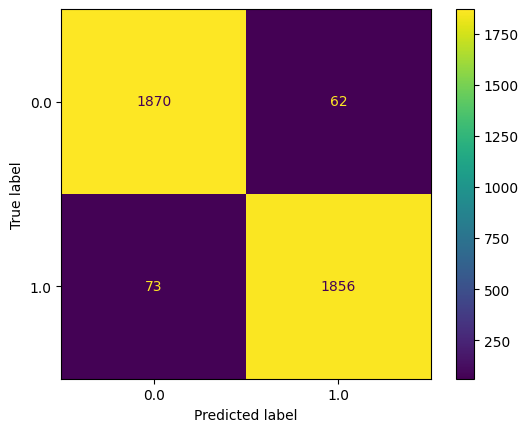

In [97]:
brfc = BalancedRandomForestClassifier(criterion = 'entropy', max_depth = 20, max_features = 'auto', min_samples_leaf = 1, min_samples_split = 2, n_estimators = 200, random_state = 42)
brfc.fit(x_bal_train, y_bal_train)
confusion_matrix(brfc, x_bal_test, y_bal_test)

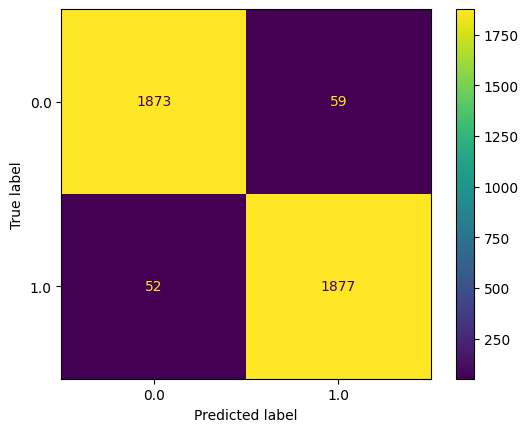

In [71]:
xgb = XGBClassifier(learning_rate = 0.2, max_depth = None, n_estimators = 100, objective = 'binary:logistic', random_state = 42)
xgb.fit(x_bal_train, y_bal_train)
confusion_matrix(xgb, x_bal_test, y_bal_test)

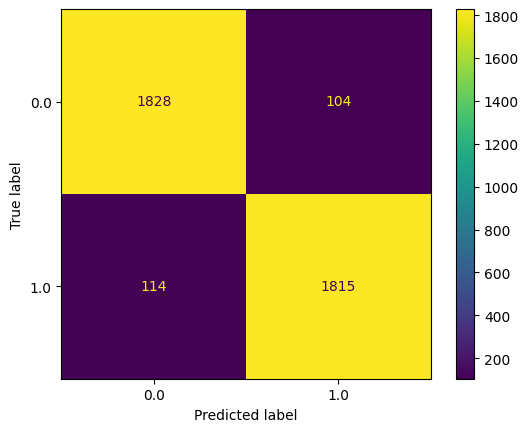

In [74]:
dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth = 20, max_features = 'auto', min_samples_leaf = 1, min_samples_split = 10, random_state = 42)
dtc.fit(x_bal_train, y_bal_train)
confusion_matrix(dtc, x_bal_test, y_bal_test)

PLOTTING AUC-ROC CURVE

In [91]:
def auc_roc(model, x_bal_train, y_bal_train, x_bal_test, y_bal_test):
  model.fit(x_bal_train, y_bal_train)

  y_pred_prob = model.predict_proba(x_bal_test)[:, 1]
  fpr, tpr, thresholds = roc_curve(y_bal_test, y_pred_prob)
  roc_auc = auc(fpr, tpr)

  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f"Receiver Operating Characteristic - {model}")
  plt.legend(loc="lower right")
  plt.show()

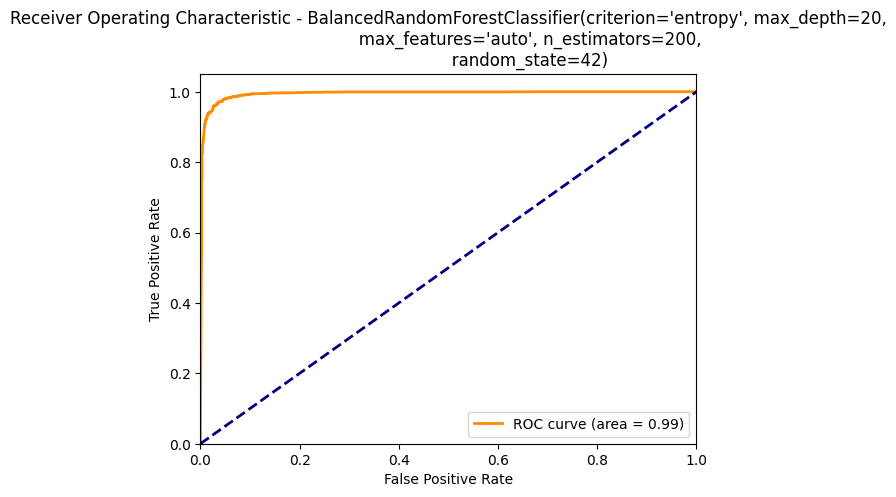

In [98]:
# Balanced Random Forest Classifier

auc_roc(brfc, x_bal_train, y_bal_train, x_bal_test, y_bal_test)

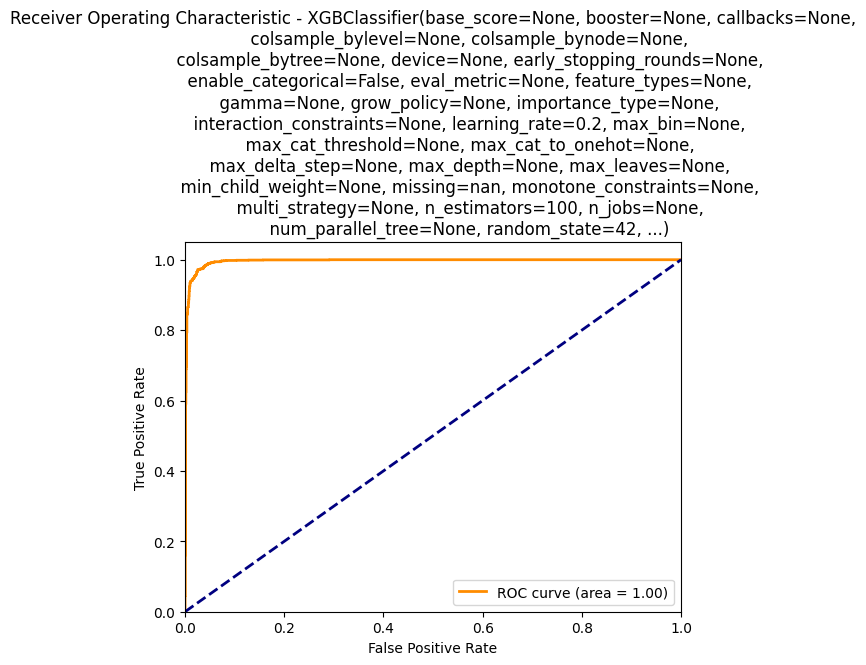

In [93]:
# XGBoost Classifier

auc_roc(xgb, x_bal_train, y_bal_train, x_bal_test, y_bal_test)

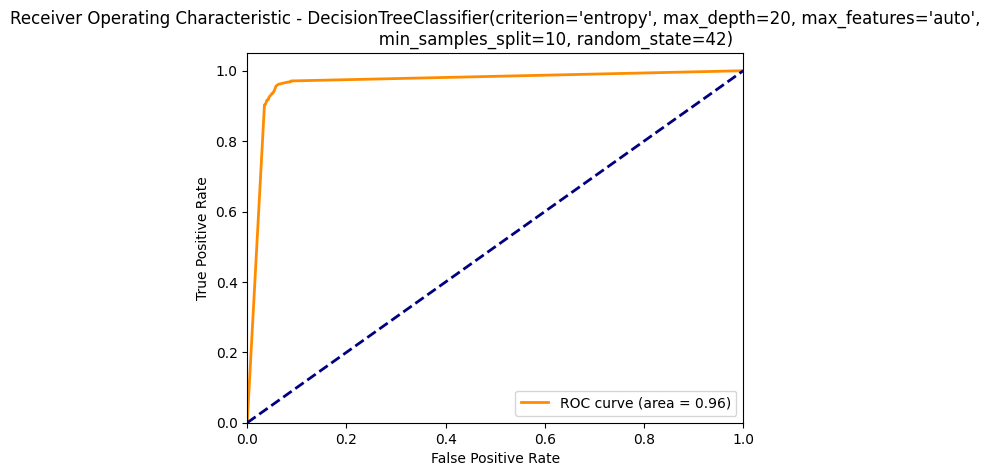

In [94]:
auc_roc(dtc, x_bal_train, y_bal_train, x_bal_test, y_bal_test)

Best Performing Model - XGBoost Classifier with the following parameters:

{'learning_rate': 0.2, 'max_depth': None, 'n_estimators': 100, 'objective : binary'}

Achieved an accuracy of 97%

The recall for both classes is also very high, meaning that the model correctly identifies 97% of all actual non-fraudulent and fraudulent transactions.

**In our case, correctly identifying fraudulent transactions is paramount, and the model achieves this with an accuracy of 97%.**







